1. A message “m” is encrypted using textbook RSA algorithm with 3 different modulus but
the same encryption exponents, correspondingly generating 3 ciphertexts. Now, using the
three ciphertext and the associated public keys, design an algorithm to obtain the original message “m”.

The ciphertexts and their corresponding public keys are provided in the attached excel
sheet. For instance - Ciphertext C1 is generated using e = K1[0] and n = K1[1].
The report should clearly highlight the obtained message “m”.

In [3]:
k1=[3, 11905759]
k2=[3, 2963659]
k3=[3, 12635071]

c1=3802241
c2=647960
c3=3547994


I took a reference from the following link to solve this problem:
https://crypto.stackexchange.com/questions/6713/low-public-exponent-attack-for-rsa

In [4]:
# check pairwise coprimality of the moduli
from math import gcd
print(gcd(k1[1], k2[1]))
print(gcd(k1[1], k3[1]))
print(gcd(k2[1], k3[1]))

1
1
1


In [5]:
n1, n2, n3 = k1[1], k2[1], k3[1]
e=3


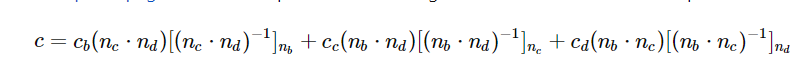

In [15]:
import sympy

def attack(e,n1,n2,n3,c1,c2,c3):
    # calculating the intermediates
    N1=n2*n3
    N2=n1*n3
    N3=n1*n2
    N=n1*n2*n3
    # calculate the inverses
    inv1 = sympy.mod_inverse(N1, n1)
    inv2 = sympy.mod_inverse(N2, n2)
    inv3 = sympy.mod_inverse(N3, n3)
    
    t1=c1*N1*inv1
    t2=c2*N2*inv2
    t3=c3*N3*inv3
    c=(t1+t2+t3)%N
    
    # find the e-th root
    m = sympy.root(c, e)
    return m

m = attack(e,n1,n2,n3,c1,c2,c3)
print(m)



    

6263


#### Verifying the solution:

In [17]:
c1_=pow(m,e,n1)
c2_=pow(m,e,n2)
c3_=pow(m,e,n3)

print(c1_, c2_, c3_)

if c1_== c1 and c2_==c2 and c3_==c3:
    print("Attack successful")


3802241 647960 3547994
Attack successful
